### 3. In order to isolate the effects of GR from the effects of SR, use a non-relativistic polytropic EoS of the form $P=K\epsilon^{\Gamma}$, and construct the mass radius diagram. Compare the results to all the previous cases.



In [1]:
from matplotlib import pyplot as plt    # For plotting things
import numpy as np                      # For mathematical/numerical applications
from scipy.integrate import odeint      # For integrating ODEs
import math   # We need this in order to use some mathematical functions etc.
from IPython.display import display, Math, Latex   # This imports the option of 
                                                 # printing out teX using display()

import sys 
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.display import display, clear_output    

# only SR effects
def eps2(P,n):
    return np.power(P,n/(n+1))


def starTOV2(y,r,G,K):
    return (4.0*np.pi*r**2.0*eps2(y[1],n), \
            (-eps2(y[1],n)*(G/K)*2.0*y[0]/r**2.0)*(1+y[1]/eps2(y[1],n))*(1+4.0*np.pi*r**3.0*y[1]/y[0])*(1.0-2.0*y[0]/r)**(-1.0))

X1 = np.logspace(math.log10(0.0001), math.log10(4), 100) # This defines the range of 
                                                    # central densities to use.
X2 = np.logspace(math.log10(4), math.log10(50), 100)
G=1
K=1

M_plot5 = []
R_plot5 = []
P_plot5 = []
eps_plot5 = []
rho_c_plot5 = []

r_max = 50.0

X = X1
r_grid = 1001
n = 3.0 # gamma = 4/3
#n = 1.5 # gamma = 5/3

itter = 1
while itter <3 :
    l = X.size
    #display(l) 
    
    for j in range(0,l):
        y0 = (0.0, X[j])
    

        r = np.linspace(0, r_max, r_grid)
        dr = r[1]-r[0]
    #display(dr)
        
        rho_c = y0[1]**(n/(n+1))
        eps_c = eps2(y0[1],n)

    #display(rho_c)

        y1 = (4.0*np.pi*eps_c*dr**3.0/3.0, \
          y0[1]-2.0*np.pi*(eps_c+y0[1])*(y0[1]+eps_c/3.0)*dr**2.0)
    #
    #
        mass_r = [y0[0]]  
    #p_fermi_r = [y0[1]]
        r_coord = [0.0]
    #rho_r = [rho_c]
    #
        mass_r.append(y1[0])
    #p_fermi_r.append(y1[1])
        r_coord.append(dr)
    #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
    #                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))))
    #
        i=2
        s=10
        while y1[1] > 0 and s <len(r) :
            r2 = r[i-1:i+1]

            sol_test = odeint(starTOV2, y1, r2, args =(G, K))
        #display(soln10_pert[:,0])
        #display(soln10_pert[:,1])
            y1 = (sol_test[1,0],sol_test[1,1])
        #display(y1)
        #display(r2)
            mass_r.append(sol_test[1,0])
        #p_fermi_r.append(sol_test[1,1])
            r_coord.append(r2[1])
        #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
        #              -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))) )
            i=i+1
            s=s+1
       
        R_star = r_coord[-1]
        M_star = mass_r[-2]
        M_plot5.append(M_star)
        R_plot5.append(R_star)
        rho_c_plot5.append(rho_c)
        P_plot5.append(y0[1])
        eps_plot5.append(eps_c)
    #print('Mass =', M_star)
    #print('Radius =', R_star)
        r_max = max([R_star, 3.0])  
# Here we will add a counter that will indicate where we are in our itteration 
# process.
        clear_output(wait=True)
        display('String '+str(itter)+', Itteration: '+str(j))
    #print(j, M_star, R_star)
    #display(itter)
    #display(M_star)
    #display(R_star)
    
    X = X2
    r_grid = 20001
    itter=itter+1

print('end')

'String 2, Itteration: 99'

end


In [2]:
# GR effects
def eps(P,n):
    return np.power(P,n/(n+1))+n*P


def starTOV(y,r,G,K):
    return (4.0*np.pi*r**2.0*eps(y[1],n), \
            (-eps(y[1],n)*(G/K)*2.0*y[0]/r**2.0)*(1+y[1]/eps(y[1],n))*(1+4.0*np.pi*r**3.0*y[1]/y[0])*(1.0-2.0*y[0]/r)**(-1.0))

X1 = np.logspace(math.log10(0.0001), math.log10(4), 100) # This defines the range of 
                                                    # central densities to use.
X2 = np.logspace(math.log10(4), math.log10(50), 100)
G=1
K=1

M_plot4 = []
R_plot4 = []
P_plot4 = []
eps_plot4 = []
rho_c_plot4 = []

r_max = 50.0

X = X1
r_grid = 1001
n = 3.0 # gamma = 4/3
#n = 1.5 # gamma = 5/3

itter = 1
while itter <3 :
    l = X.size
    #display(l) 
    
    for j in range(0,l):
        y0 = (0.0, X[j])
    

        r = np.linspace(0, r_max, r_grid)
        dr = r[1]-r[0]
    #display(dr)
        
        rho_c = y0[1]**(n/(n+1))
        eps_c = eps(y0[1],n)

    #display(rho_c)

        y1 = (4.0*np.pi*eps_c*dr**3.0/3.0, \
          y0[1]-2.0*np.pi*(eps_c+y0[1])*(y0[1]+eps_c/3.0)*dr**2.0)
    #
    #
        mass_r = [y0[0]]  
    #p_fermi_r = [y0[1]]
        r_coord = [0.0]
    #rho_r = [rho_c]
    #
        mass_r.append(y1[0])
    #p_fermi_r.append(y1[1])
        r_coord.append(dr)
    #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
    #                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))))
    #
        i=2
        s=10
        while y1[1] > 0 and s <len(r) :
            r2 = r[i-1:i+1]

            sol_test = odeint(starTOV, y1, r2, args =(G, K))
        #display(soln10_pert[:,0])
        #display(soln10_pert[:,1])
            y1 = (sol_test[1,0],sol_test[1,1])
        #display(y1)
        #display(r2)
            mass_r.append(sol_test[1,0])
        #p_fermi_r.append(sol_test[1,1])
            r_coord.append(r2[1])
        #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
        #              -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))) )
            i=i+1
            s=s+1
       
        R_star = r_coord[-1]
        M_star = mass_r[-2]
        M_plot4.append(M_star)
        R_plot4.append(R_star)
        rho_c_plot4.append(rho_c)
        P_plot4.append(y0[1])
        eps_plot4.append(eps_c)
    #print('Mass =', M_star)
    #print('Radius =', R_star)
        r_max = max([R_star, 3.0])  
# Here we will add a counter that will indicate where we are in our itteration 
# process.
        clear_output(wait=True)
        display('String '+str(itter)+', Itteration: '+str(j))
    #print(j, M_star, R_star)
    #display(itter)
    #display(M_star)
    #display(R_star)
    
    X = X2
    r_grid = 20001
    itter=itter+1

print('end')

'String 2, Itteration: 99'

end


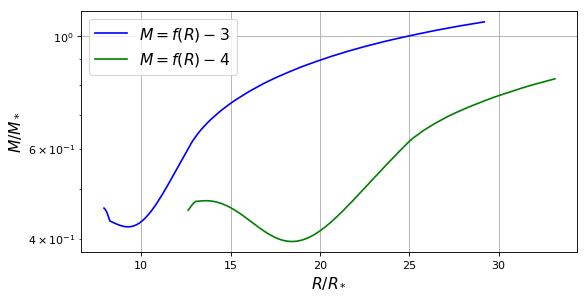

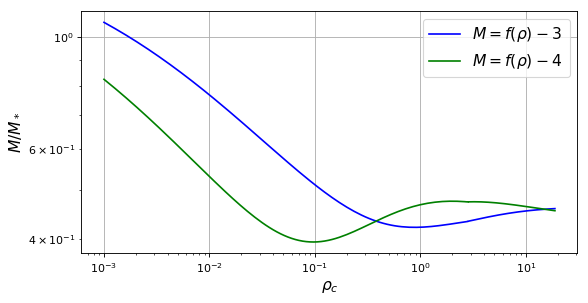

In [3]:
plt.figure(figsize=(8, 4), dpi=80)

plt.plot(R_plot5[0:200], M_plot5[0:200], 'b', \
         label=r'$M=f(R) - 3$ ') 
plt.plot(R_plot4[0:200], M_plot4[0:200], 'g', \
         label=r'$M=f(R) - 4$ ')   

plt.legend(loc='best', fontsize=14)
plt.xlabel(r'$R/R_*$', fontsize=14)
plt.ylabel(r'$M/M_*$', fontsize=14)
plt.yscale("log")
plt.grid()
plt.show()

plt.figure(figsize=(8, 4), dpi=80)

plt.plot(rho_c_plot5[:], M_plot5[:], 'b', \
         label=r'$M=f(\rho) -3$')   # The plots
plt.plot(rho_c_plot4[:], M_plot4[:], 'g', \
         label=r'$M=f(\rho) -4$ ')   # The plots

plt.legend(loc='best', fontsize=14)
plt.xlabel(r'$\rho_c$', fontsize=14)
plt.ylabel(r'$M/M_*$', fontsize=14)
plt.xscale("log")  # This changes the scale to logarithmic
plt.yscale("log")
plt.grid()
plt.show()

### 4. Calculate the mass-radius diagram for White Dwarfs using the TOV equations and the EoS for degenerate electrons, where the mass is provided by the nuclei which are always nonrelativistic. Observe the transition from non-relativistic to relativistic electrons. What happens with stability?

In [80]:
from ipykernel import kernelapp as app
from matplotlib import pyplot as plt    
import numpy as np                      
from scipy.integrate import odeint 
from scipy import optimize
from fractions import Fraction
import math

import sys
import warnings
if not sys.warnoptions: 
    warnings.simplefilter("ignore")
from IPython.display import display, clear_output  

G=1.0                 # Arbitrary units
K=1.0                 # Arbitrary units
  
# These define a function that calculates the derivatives of the system 
# dY/dr = f(Y,r:G,Gamma,K)

# Non Relativistic EOS for White Dwarfs
def star_NonRel_WD(y, r, G, K):
    return (4.0*y[1]**3.0*r**2.0/(3.0*np.pi), -G*y[0]/(K*y[1]*r**2.0))

# Relativistic EOS for White Dwarfs
def star_Rel_WD(y, r , G, K):
    return (4.0*y[1]**3.0*r**2.0/(3.0*np.pi), -3.0*G*y[0]*y[1]/(K*4.0*r**2.0))
    

# ============ KEEP IN MIND =====================
# y[0] = m , y[1] = x
# sol[0] = m(r) , sol[1] = rho = x(r)
# ===============================================

      
def star2(y, r, G, K):
     return (4.0*np.pi*(( y[1]*np.sqrt(1+y[1]**2.0)*(1+2.0*y[1]**2.0)\
                    -np.log(y[1]+np.sqrt(1+y[1]**2.0)))/(8.0*np.pi**2.0))*r**2.0, \
             -(G/K)*y[0]*pow(y[1]**4.0/(3.0*np.pi**2.0*np.sqrt(1+y[1]**2.0)),-1.0)\
             *(( y[1]*np.sqrt(1+y[1]**2.0)*(1+2.0*y[1]**2.0)\
                        -np.log(y[1]+np.sqrt(1+y[1]**2.0)))/(8.0*np.pi**2.0))/r**2.0)   
    
    

y0 = (0.0, 4.0)
    
r = np.linspace(0, 5, 1001)
dr = r[1]-r[0]
display(dr)

rho_c = (y0[1]*np.sqrt(1+y0[1]**2.0)*(1+2.0*y0[1]**2.0)\
         -np.log(y0[1]+np.sqrt(1+y0[1]**2.0)))/(8.0*np.pi**2.0)

display(rho_c)

y1 = ((4.0/3.0)*np.pi*rho_c*dr**3.0, \
       y0[1]-(2.0*np.pi*G/(3.0*K*y0[1]**4.0/(3.0*np.pi**2.0*np.sqrt(1+y0[1]**2.0)))\
              *rho_c**2.0*dr**2.0))

      
display(y1)      # This is our initial guess given by the Teylor expansion
 


mass_r = [y0[0]]  
p_fermi_r = [y0[1]]
r_coord = [0.0]
rho_r = [rho_c]

mass_r.append(y1[0])
p_fermi_r.append(y1[1])
r_coord.append(dr)
rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0)))/(8.0*np.pi**2.0))

i=2
j=10
while y1[1] > 0 and j <len(r) :
    r2 = r[i-1:i+1]

    sol_test = odeint(star2, y1, r2, args =(G, K))
        #display(soln10_pert[:,0])
        #display(soln10_pert[:,1])
    y1 = (sol_test[1,0],sol_test[1,1])
    #display(y1)
    #display(r2)
    mass_r.append(sol_test[1,0])
    p_fermi_r.append(sol_test[1,1])
    r_coord.append(r2[1])
    rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0)))/(8.0*np.pi**2.0) )
    i=i+1
    j=j+1


R_star = r_coord[-1]
M_star = mass_r[-1]

X1 = np.logspace(math.log10(0.01), math.log10(4), 100) # This defines the range of 
                                                    # central densities to use.
X2 = np.logspace(math.log10(4), math.log10(50), 100)


M_plot = []
R_plot = []
rho_c_plot = []    

r_max = 50.0

X = X1
r_grid = 1001

itter = 1
while itter <3 :
    l = X.size
    #display(l) 
    
    for j in range(0,l):
        y0 = (0.0, X[j])
    

        r = np.linspace(0, r_max, r_grid)
        dr = r[1]-r[0]
    #display(dr)

        rho_c = (y0[1]*np.sqrt(1+y0[1]**2.0)*(1+2.0*y0[1]**2.0)\
                 -np.log(y0[1]+np.sqrt(1+y0[1]**2.0)))/(8.0*np.pi**2.0)

    #display(rho_c)

        y1 = ((4.0/3.0)*np.pi*rho_c*dr**3.0, \
          y0[1]-(2.0*np.pi*G/(3.0*K*y0[1]**4.0/(3.0*np.pi**2.0*np.sqrt(1+y0[1]**2.0)))\
                  *rho_c**2.0*dr**2.0))
    #
    #
        mass_r = [y0[0]]  
    #p_fermi_r = [y0[1]]
        r_coord = [0.0]
    #rho_r = [rho_c]
    #
        mass_r.append(y1[0])
    #p_fermi_r.append(y1[1])
        r_coord.append(dr)
    #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
    #                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))))
    #
        i=2
        s=10
        while y1[1] > 0 and s <len(r) :
            r2 = r[i-1:i+1]

            sol_test = odeint(star2, y1, r2, args =(G, K))
        #display(soln10_pert[:,0])
        #display(soln10_pert[:,1])
            y1 = (sol_test[1,0],sol_test[1,1])
        #display(y1)
        #display(r2)
            mass_r.append(sol_test[1,0])
        #p_fermi_r.append(sol_test[1,1])
            r_coord.append(r2[1])
        #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
        #              -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))) )
            i=i+1
            s=s+1
       
        R_star = r_coord[-1]
        M_star = mass_r[-1]
        M_plot.append(M_star)
        R_plot.append(R_star)
        rho_c_plot.append(rho_c)
    #print('Mass =', M_star)
    #print('Radius =', R_star)
        r_max = max([R_star, 3.0])  
# Here we will add a counter that will indicate where we are in our itteration 
# process.
        clear_output(wait=True)
        display('String '+str(itter)+', Itteration: '+str(j))
    #print(j, M_star, R_star)
    #display(itter)
    #display(M_star)
    #display(R_star)
    
    X = X2
    r_grid = 20001
    itter=itter+1

print('end')

'String 2, Itteration: 99'

end


In [81]:
X1 = np.logspace(math.log10(0.01), math.log10(4), 100) # This defines the range of 
                                                    # central densities to use.
X2 = np.logspace(math.log10(4), math.log10(50), 100)


M_plot2 = []
R_plot2 = []
rho_c_plot2 = []    

r_max = 50.0

X = X1
r_grid = 1001

itter = 1
while itter <3 :
    l = X.size
    #display(l) 
    
    for j in range(0,l):
        y0 = (0.0, X[j])
    

        r = np.linspace(0, r_max, r_grid)
        dr = r[1]-r[0]
    #display(dr)

        rho_c = y0[1]**3.0/(3.0*np.pi**2.0) 
        
    #display(rho_c)

        y1 = ((4.0/(9.0*np.pi)*y0[1]**3.0*dr**3.0, y0[1]-(G*y0[0]/y0[1]*dr)))
    #
        mass_r = [y0[0]]  
    #p_fermi_r = [y0[1]]
        r_coord = [0.0]
    #rho_r = [rho_c]
    #
        mass_r.append(y1[0])
    #p_fermi_r.append(y1[1])
        r_coord.append(dr)
    #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
    #                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))))
    #
        i=2
        s=10
        while y1[1] > 0 and s <len(r) :
            r2 = r[i-1:i+1]

            sol_test = odeint(star_NonRel_WD, y1, r2, args =(G, K))
        #display(soln10_pert[:,0])
        #display(soln10_pert[:,1])
            y1 = (sol_test[1,0],sol_test[1,1])
        #display(y1)
        #display(r2)
            mass_r.append(sol_test[1,0])
        #p_fermi_r.append(sol_test[1,1])
            r_coord.append(r2[1])
        #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
        #              -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))) )
            i=i+1
            s=s+1
       
        R_star = r_coord[-1]
        M_star = mass_r[-1]
        M_plot2.append(M_star)
        R_plot2.append(R_star)
        rho_c_plot2.append(rho_c)
    #print('Mass =', M_star)
    #print('Radius =', R_star)
        r_max = max([R_star, 3.0])  
# Here we will add a counter that will indicate where we are in our itteration 
# process.
        clear_output(wait=True)
        display('String '+str(itter)+', Itteration: '+str(j))
    #print(j, M_star, R_star)
    #display(itter)
    #display(M_star)
    #display(R_star)
    
    X = X2
    r_grid = 20001
    itter=itter+1

print('end')

'String 2, Itteration: 99'

end


In [82]:
X1 = np.logspace(math.log10(0.01), math.log10(4), 100) # This defines the range of 
                                                    # central densities to use.
X2 = np.logspace(math.log10(4), math.log10(50), 100)


M_plot3 = []
R_plot3 = []
rho_c_plot3 = []    

r_max = 50.0

X = X1
r_grid = 1001

itter = 1
while itter <3 :
    l = X.size
    #display(l) 
    
    for j in range(0,l):
        y0 = (0.0, X[j])
    

        r = np.linspace(0, r_max, r_grid)
        dr = r[1]-r[0]
    #display(dr)

        rho_c = y0[1]**3.0/(3.0*np.pi**2.0) 
        
    #display(rho_c)

        y1 = ((4.0/(9.0*np.pi))*y0[1]**3.0*dr**3.0, y0[1]-(3.0*G*y0[0]*y0[1]/(4.0*dr)))
    #
        mass_r = [y0[0]]  
    #p_fermi_r = [y0[1]]
        r_coord = [0.0]
    #rho_r = [rho_c]
    #
        mass_r.append(y1[0])
    #p_fermi_r.append(y1[1])
        r_coord.append(dr)
    #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
    #                      -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))))
    #
        i=2
        s=10
        while y1[1] > 0 and s <len(r) :
            r2 = r[i-1:i+1]

            sol_test = odeint(star_Rel_WD, y1, r2, args =(G, K))
        #display(soln10_pert[:,0])
        #display(soln10_pert[:,1])
            y1 = (sol_test[1,0],sol_test[1,1])
        #display(y1)
        #display(r2)
            mass_r.append(sol_test[1,0])
        #p_fermi_r.append(sol_test[1,1])
            r_coord.append(r2[1])
        #rho_r.append((y1[1]*np.sqrt(1+y1[1]**2.0)*(1+2.0*y1[1]**2.0)\
        #              -np.log(y1[1]+np.sqrt(1+y1[1]**2.0))) )
            i=i+1
            s=s+1
       
        R_star = r_coord[-1]
        M_star = mass_r[-1]
        M_plot3.append(M_star)
        R_plot3.append(R_star)
        rho_c_plot3.append(rho_c)
    #print('Mass =', M_star)
    #print('Radius =', R_star)
        r_max = max([R_star, 3.0])  
# Here we will add a counter that will indicate where we are in our itteration 
# process.
        clear_output(wait=True)
        display('String '+str(itter)+', Itteration: '+str(j))
    #print(j, M_star, R_star)
    #display(itter)
    #display(M_star)
    #display(R_star)
    
    X = X2
    r_grid = 20001
    itter=itter+1

print('end')

'String 2, Itteration: 99'

end


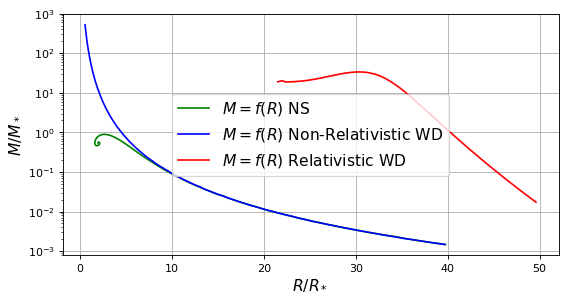

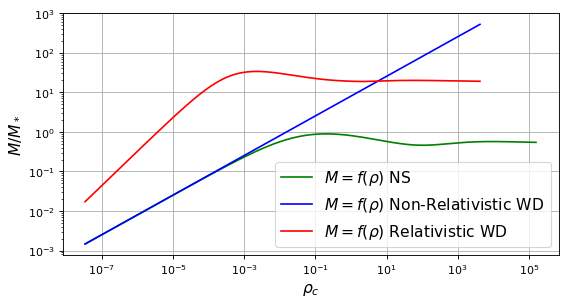

In [83]:
plt.figure(figsize=(8, 4), dpi=80)


plt.plot(R_plot[0:200], M_plot[0:200], 'g', \
         label=r'$M=f(R)$ NS')   # The plots
plt.plot(R_plot2[0:200], M_plot2[0:200], 'b', \
         label=r'$M=f(R)$ Non-Relativistic WD')   # The plots
plt.plot(R_plot3[0:200], M_plot3[0:200], 'r', \
         label=r'$M=f(R)$ Relativistic WD')   # The plots


plt.legend(loc='best', fontsize=14)
plt.xlabel(r'$R/R_*$', fontsize=14)
plt.ylabel(r'$M/M_*$', fontsize=14)
plt.yscale("log")
plt.grid()
plt.show()

plt.figure(figsize=(8, 4), dpi=80)

plt.plot(rho_c_plot[:], M_plot[:], 'g', \
         label=r'$M=f(\rho)$ NS')   # The plots
plt.plot(rho_c_plot2[:], M_plot2[:], 'b', \
         label=r'$M=f(\rho)$ Non-Relativistic WD')   # The plots
plt.plot(rho_c_plot3[:], M_plot3[:], 'r', \
         label=r'$M=f(\rho)$ Relativistic WD')   # The plots

plt.legend(loc='best', fontsize=14)
plt.xlabel(r'$\rho_c$', fontsize=14)
plt.ylabel(r'$M/M_*$', fontsize=14)
plt.xscale("log")  # This changes the scale to logarithmic
plt.yscale("log")
plt.grid()
plt.show()

### Construct the mass radius diagrams for the different polytropes using the relativistic Lane-Emden.

In [4]:
# mind that r represents ksi
def starLE2(y,r,G,K,n,l):
    return (4.0*np.pi*(1+n*l*(y[1]-1))*y[1]**n*r**2.0, 
            -(y[0]/r**2.0)*(1-n*l)*(1+(n+1)*l*y[1]/(1-n*l))*\
            (1+(l*4.0*np.pi*r**3.0*y[1]**(n+1))/y[0])*(1-2.0*(n+1)*l*y[0]/r)**(-1))

def Rel_LE(n):

    X1 = np.logspace(math.log10(0.0001), math.log10(4), 100) # This defines the range of central densities to use.
    X2 = np.logspace(math.log10(4), math.log10(50), 100)
    G=1
    K=1

    M_plot6 = []
    R_plot6 = []
    rho_c_plot6 = []

    rN_max = 200.0
    X = X1
    r_grid = 5001

    itter = 1
    while itter <3 :
        l = X.size 

        for j in range(0,l):
            
            rho_c = X[j]
            y0 = (0.0,1.0)
            
            eps_c = rho_c+n*K*np.power(rho_c,1.0+1.0/n)
            lamda = (K*rho_c**(1+1/n))/eps_c
            alpha = np.sqrt((n+1)*K*np.power(rho_c,-1+1/n)*(1-n*lamda)**2.0)
            
            r_max = rN_max/alpha
            r = np.linspace(0, r_max, r_grid)
            dr = r[1]-r[0]

            y1 = ((4.0*np.pi/3.0)*(1+n*lamda*(y0[1]-1))*y0[1]**n*dr**3.0 ,\
                  y0[1]-(2.0*np.pi/3.0)*((1-n*lamda)+(n+1)*lamda*y0[1])*y0[1]**(n+1)*dr**3.0)

            mass_r = [y0[0]]  
            r_coord = [0.0]

            mass_r.append(y1[0])
            r_coord.append(dr)

            i=2
            s=10
            while y1[1] > 0 and s <len(r) :
                r2 = r[i-1:i+1]

                sol_test = odeint(starLE2, y1, r2, args =(G, K, n, lamda))
                
                y1 = (sol_test[1,0],sol_test[1,1])

                mass_r.append(sol_test[1,0])
                r_coord.append(r2[1])

                i=i+1
                s=s+1

            R_star = r_coord[-2]*alpha
            M_star = eps_c*mass_r[-2]*alpha**3.0
            M_plot6.append(M_star)
            R_plot6.append(R_star)
            rho_c_plot6.append(rho_c)

            r_max = max([r_coord[-1], 3.0/alpha])  

            clear_output(wait=True)
            display('String '+str(itter)+', Itteration: '+str(j))

        X = X2
        r_grid = 20001
        itter=itter+1

    print('end')
    return(M_plot6,R_plot6,rho_c_plot6)

'String 2, Itteration: 99'

end


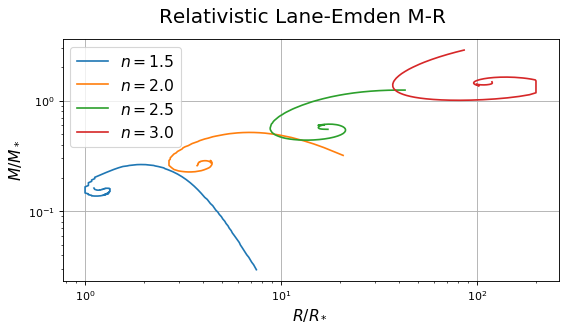

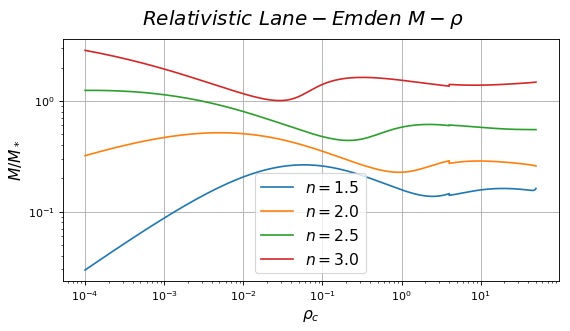

In [5]:
# # Run the programm for a variety of n
nArray = np.array([1.5,2.0,2.5,3.0]) 
nA = len(nArray)

plt.figure(figsize=(8, 4), dpi=80)
# plt.figure(1)
plt.suptitle('Relativistic Lane-Emden M-R', fontsize=18)

for i in range(0,nA):
    (m,r,rho) = Rel_LE(nArray[i])
    plt.plot(r[0:200], m[0:200], label=r'$n=$'+str(nArray[i]))
    
plt.legend(loc='best', fontsize=14)
plt.xlabel(r'$R/R_*$', fontsize=14)
plt.ylabel(r'$M/M_*$', fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.grid()
# plt.show()  

plt.figure(figsize=(8, 4), dpi=80)
#plt.figure(2)
plt.suptitle(r'$Relativistic \ Lane-Emden \ M-\rho$', fontsize=18)

for i in range(0,nA):
    (m,r,rho) = Rel_LE(nArray[i])
    plt.plot(rho[:], m[:], label=r'$n=$'+str(nArray[i]))
    
plt.legend(loc='best', fontsize=14)
plt.xlabel(r'$\rho_c$', fontsize=14)
plt.ylabel(r'$M/M_*$', fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()
                   

### 5. Construct the mass radius diagram for different realistic EoSs and compare them in the same mass-radius diagram.

In [1]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 3CD5-360D

 Directory of C:\Users\Laz\Documents\Physics\Computational Physics AUTH (MSc)\Astrophysics\Final

08/07/2019  06:04 ££    <DIR>          .
08/07/2019  06:04 ££    <DIR>          ..
07/07/2019  04:21 ££    <DIR>          .ipynb_checkpoints
01/07/2019  06:35 ££    <DIR>          __pycache__
15/06/2019  09:08 ££            95.761 7. Final_Exercises.pdf
08/07/2019  06:03 ££             7.038 eosA_jupyter.txt
08/07/2019  06:04 ££            11.868 eosAPR_jupyter.txt
08/07/2019  06:04 ££             5.109 eosAU.txt
17/04/2019  03:22 §£           663.380 eosSLY_model1.txt
17/04/2019  03:22 §£           663.380 eosSLY_model2.txt
17/04/2019  03:22 §£           663.379 eosSLY_model3.txt
17/04/2019  03:22 §£           663.379 eosSLY_model4.txt
17/04/2019  03:22 §£           663.379 eosSLY_model5.txt
17/04/2019  03:22 §£           663.379 eosSLY_model6.txt
17/04/2019  03:22 §£           663.379 eosSLY_model7.txt
17/04/2019  03:22 §£

In [78]:
import os
import numpy as np 
from io import StringIO   # StringIO behaves like a file object

from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from IPython.display import display, Math, Latex 
from decimal import Decimal
import numpy as np                      # For mathematical/numerical applications
from scipy.integrate import odeint      # For integrating ODEs
G=1.0                 # Arbitrary units
K=1.0 

def tov1(y, r, G, K):
     return (4.0*np.pi*y[1]*r**2.0, \
             -((G/K)*(y[1]+eos(y[1]))*(y[0]+4.0*np.pi*eos(y[1])*r**3.0)\
             /(r*(r-2.0*y[0])))/d_eos(y[1]))

# CGS units

#c=2.9979e10
#G=6.67408e-8
#Msun=1.989e33

def EOS_calculator(data_file):
    
    data_set1 = np.genfromtxt(data_file)
    data_set2 = np.loadtxt(data_file)

    G_over_c2 = (6.67408e-8)/(2.9979e10**2.0) #(in cm/gr) converts gr to cm
    #display(G_over_c2)

    G_over_c4 = (6.67408e-8)/(2.9979e10**4.0) #(in cm^-2/(dyns/cm^2))
    #display(G_over_c4)                       # or cm^-2/(gr/cm^3)
    
    display(Math(r'M_{\odot} = '+str('%6.3f' % Decimal(1.989e33*G_over_c2/(1e5)))+'\; km'))

    # display(len(data_set1))


    p_rho_tab = []

    itter = 0
    while itter <len(data_set1) :
        p_rho_tab.append([data_set1[itter,0],data_set1[itter,1]])
        itter=itter + 1

    print(r'min in geometric units ($cm^{-2}$)')    
    display(p_rho_tab[0][1]*G_over_c4)  # cm^-2
    display(p_rho_tab[0][0]*G_over_c2)  # cm^-2 

    print(r'max in geometric units ($cm^{-2}$)')
    display(p_rho_tab[-1][1]*G_over_c4)  # cm^-2
    display(p_rho_tab[-1][0]*G_over_c2)  # cm^-2 

    p_rho_tab_geo = []   # We add here two point that correspond to 
    x_1 = [-0.01]        # negative and zero pressure and density in the EoS
    y_1 = [-0.01]        # This will help with the surface location

    x_1.append(0.0)      # since negative values will not fall outside 
    y_1.append(0.0)      # the interpolation range
                         # Here we convert the pressure and density to
                         # geometric units and in km specifically

    itter = 0
    while itter <len(data_set1) :
        p_rho_tab_geo.append((data_set1[itter,0]*G_over_c2,data_set1[itter,1]*G_over_c4))
        x_1.append(data_set1[itter,0]*G_over_c2*1e10)
        y_1.append(data_set1[itter,1]*G_over_c4*1e10)
        itter=itter + 1

                        # We also define the derivative of the pressure

    z_1 = [(y_1[1]-y_1[0])/(x_1[1]-x_1[0])]    

    itter = 1
    while itter <len(x_1)-1 :
        z_1.append((y_1[itter+1]-y_1[itter-1])/(x_1[itter+1]-x_1[itter-1]))
        itter=itter + 1    

    z_1.append((y_1[-1]-y_1[-2])/(x_1[-1]-x_1[-2]))

    #x_1 = p_rho_tab_geo[:, 0]
    #y_1 = p_rho_tab_geo[:, 1]

    eos = interp1d(x_1, y_1)
    d_eos = interp1d(x_1, z_1)
    #f2 = interp1d(x_1, y_1, kind='cubic')
    #display(x_1[-1])
    
#     plt.plot(x_1, eos(x_1), '-', x_1, d_eos(x_1), '--')

#     plt.yscale("log")  # This changes the scale to logarithmic
#     plt.xscale("log")

#     plt.xlabel(r'$\varepsilon/c^2 ( km^{-2})$')
#     plt.ylabel(r'$P ( km^{-2})$')

#     plt.legend([r'$P$', r'$dP/d\varepsilon$'], loc='best')
#     plt.show()
    
    #===========================================#
    # IT WORKS JUST FINE UNTIL HERE
    # NOW THE PROBLEM IS THE INITIAL q : 
    # m(0)=0 (mass) & ε(0)=ε_c (density)
    #===========================================#
    
    # q[1] = ε_c = x_1[-1]
    q = (0.0, x_1[-1])

    r = np.linspace(0, 20, 3001)
    dr = r[1]-r[0]
    #display(dr)

    rho_c = q[1]

    #display(rho_c)
    '%.2E' % Decimal(rho_c)

    y1 = ((4.0/3.0)*np.pi*rho_c*dr**3.0, \
           rho_c-((G/K)*(rho_c+eos(rho_c))*((2.0/3.0)*np.pi*rho_c\
                            +2.0*np.pi*eos(rho_c))*dr**2.0/d_eos(rho_c)))


    #display(y1)      # This is our initial guess given by the Teylor expansion



    mass_T_r = [q[0]]  
    r_coord = [0.0]
    rho_T_r = [rho_c/rho_c]

    mass_T_r.append(y1[0])
    r_coord.append(dr)
    rho_T_r.append(y1[1]/rho_c)

    i=2
    j=10
    while y1[1] > 0 and j <len(r) :
        r2 = r[i-1:i+1]

        sol_tov = odeint(tov1, y1, r2, args =(G, K))
            #display(soln10_pert[:,0])
            #display(soln10_pert[:,1])
        y1 = (sol_tov[1,0],sol_tov[1,1])
        #display(y1)
        #display(r2)
        mass_T_r.append(sol_tov[1,0])

        r_coord.append(r2[1])
        rho_T_r.append(y1[1]/rho_c)
        i=i+1
        j=j+1


    R_star = r_coord[-1]
    M_star = mass_T_r[-1]

    #print('Mass =', M_star/1.477,'$M_{\odot}$')
    #print('Radius =', R_star,'km')

    display(data_file)
    display(Math(r'M = '+str('%6.3f' % Decimal((M_star/1.477)))+'\; M_{\odot}'))
    display(Math(r'R = '+str('%6.3f' % R_star)+'\; km'))
    #display(r_coord)
    
    plt.plot(r_coord, mass_T_r/M_star, label=data_file)
    #plt.plot(r_coord/R_star, (mass_T_r/M_star), label=data_file)   # The plots
    # plt.plot(r_coord/R_star, rho_T_r, 'g', label=r'$\rho(r)/\rho_c$')      # The plots

    rho_c_CGS = rho_c/(G_over_c2*1e10)
    #display(rho_c_CGS)
    display(Math(r'\rho_c = '+str('%.2E' % Decimal(rho_c_CGS))+'\; gr/cm^3'))
    display('--------------------------------------------------------------')

#     plt.suptitle('Star with eosAPR', fontsize=18)

#     plt.legend(loc='best')
#     plt.xlabel(r'$r/R_*$')
#     plt.grid()
#     plt.show()


<IPython.core.display.Math object>

min in geometric units ($cm^{-2}$)


1.0561403927054683e-35

2.933344125147697e-27

max in geometric units ($cm^{-2}$)


5.1303122648289204e-12

4.541452493334502e-12

'eosA_jupyter.txt'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'--------------------------------------------------------------'

<IPython.core.display.Math object>

min in geometric units ($cm^{-2}$)


2.4973812022692043e-35

9.768135148599595e-28

max in geometric units ($cm^{-2}$)


2.3271114082425917e-13

2.705758361306454e-13

'eosAPR_jupyter.txt'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'--------------------------------------------------------------'

<IPython.core.display.Math object>

min in geometric units ($cm^{-2}$)


8.345343425383531e-42

5.792309061120796e-28

max in geometric units ($cm^{-2}$)


2.9832537066680437e-13

3.1264359459262393e-13

'eosAU.txt'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'--------------------------------------------------------------'

<IPython.core.display.Math object>

min in geometric units ($cm^{-2}$)


2.4973812022692043e-35

9.768135148599595e-28

max in geometric units ($cm^{-2}$)


2.2522511989020229e-13

3.18110643221851e-13

'eosSLy4.txt'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'--------------------------------------------------------------'

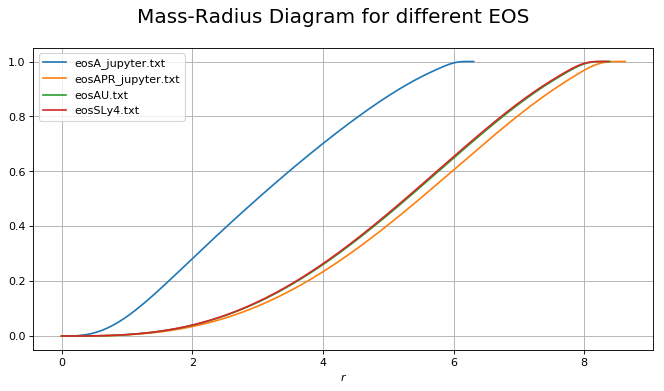

In [79]:
# Run the programm for different EOS

df1 = 'eosA_jupyter.txt'
df2 = 'eosAPR_jupyter.txt'
df3 = 'eosAU.txt'
df4 = 'eosSLy4.txt'

nArray = np.array([df1,df2,df3,df4])
nA = len(nArray)

plt.figure(figsize=(10, 5), dpi=80)
plt.suptitle('Mass-Radius Diagram for different EOS', fontsize=18)

for i in range(0,nA):
    EOS_calculator(nArray[i])
        
plt.legend(loc='best')
plt.xlabel(r'$r$')
plt.grid()
plt.show()

### 7. Calculate a rotating neutron star model using RNS and a tabulated EoS and produce a contour plot of the isodensity curves. Do this for a small mass star, an average mass star and a very massive star for relatively small and relatively rapid rotation rates. What do you observe and how does this compares to the Newtonian picture.

In [6]:
from ipykernel import kernelapp as app
from matplotlib import pyplot as plt    
import numpy as np                      
import math
import csv

import sys
import warnings
if not sys.warnoptions: 
    warnings.simplefilter("ignore")
from IPython.display import display, clear_output  

# f = open('eosSLY_model.txt', 'r')
# content = f.read()
# print(content)
# f.close()

file1 = open("eosSLY_model1.txt","r")
file2 = open("eosSLY_model2.txt","r")
file3 = open("eosSLY_model3.txt","r")
file4 = open("eosSLY_model4.txt","r")
file5 = open("eosSLY_model5.txt","r")
file6 = open("eosSLY_model6.txt","r")
file7 = open("eosSLY_model7.txt","r")
file8 = open("eosSLY_model8.txt","r")
files = [file1,file2,file3,file4,file5,file6,file7,file8]

def RNS_EOS(file):
    # here we get the parameters of the model
    lines = [line.rstrip('\n') for line in open(file.name)]
    rho_c_value = (lines[6][0:11])
    mass_value = (lines[6][12:23])
    r_value = (lines[6][36:48])
    omega_value = (lines[6][47:59])
    param_str = "M = "+mass_value + ", rho_c = "+rho_c_value + ", R = "+r_value + ", Omega = "+omega_value 
    #print(param_str)

    # now we load the data we need - sets of 65
    data = np.loadtxt(file.name, delimiter=" ", skiprows=10, usecols=[0,1,2,6])

    radius = data[:,0]
    radius = np.reshape(radius,[-1,65])
    cos_th = data[:,1]
    cos_th = np.reshape(cos_th,[-1,65])
    # NOTICE THAT rho IS A METRIC PARAMETER, NOT DENSITY!!! (READ MANUAL)
    rho = data[:,2]
    rho = np.abs(np.reshape(rho,[-1,65]))
    pressure = data[:,3]
    pressure = np.reshape(pressure,[-1,65])
    # we can find where the pressure becomes zero : star's surface
    # though, conflict with data :(
    iSurf = np.where(pressure==0)[0][0]

    r_plot = radius[:,0]
    theta_plot = np.arccos(cos_th[0,:])
    
    return r_plot,theta_plot,rho,pressure,param_str


Max Pressure_1 =  5.4848e+34
Max Pressure_2 =  7.8791e+34
Max Pressure_3 =  1.0753e+35
Max Pressure_4 =  1.4097e+35
Max Pressure_5 =  6.9213e+35
Max Pressure_6 =  1.5013e+36
Max Pressure_7 =  2.4436e+36
Max Pressure_8 =  3.4588e+36


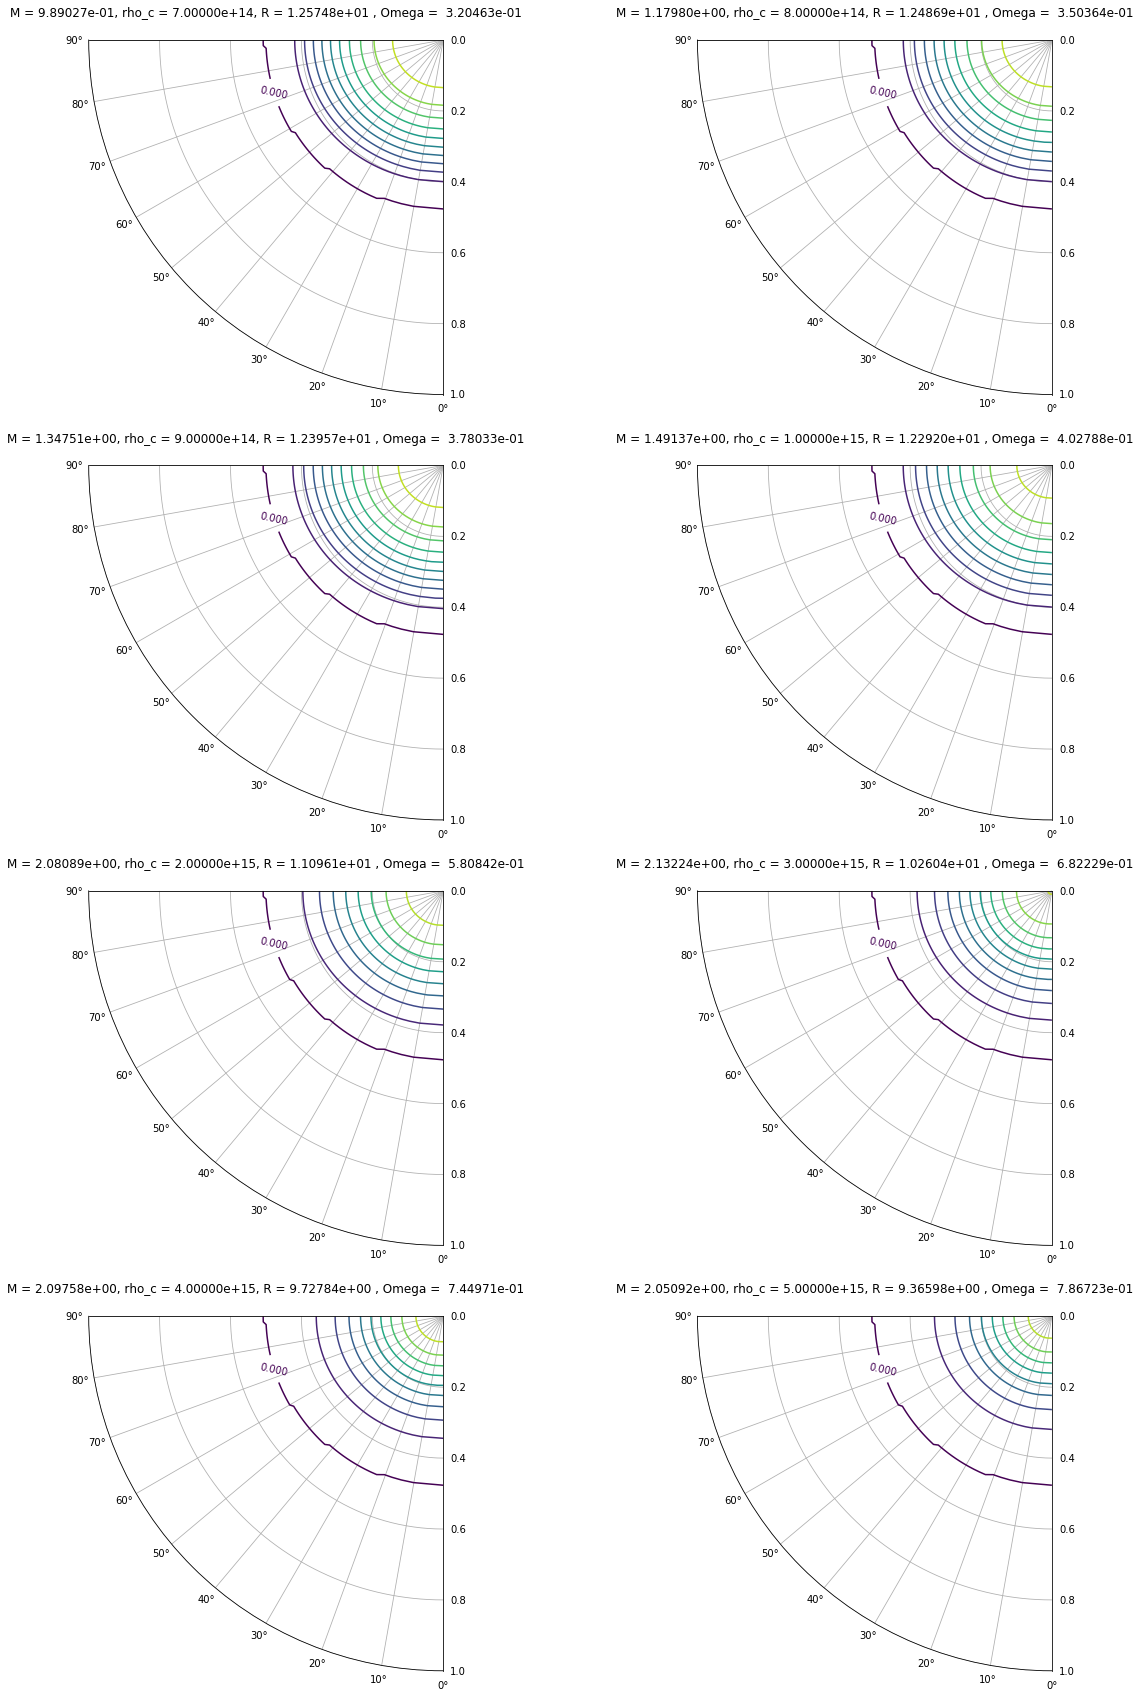

In [7]:
# contour plots for different models

plt.figure(figsize=(20,30))
i=1
for iFile in files:
    (theta,r,rho,p,title) = RNS_EOS(iFile)
    maxP = np.max(p)
    print('Max Pressure_'+str(i)+' = ',maxP)
    #print(theta.shape,r.shape,rho.shape)
    ax = plt.subplot(4,2,i,projection='polar')
    contPlot = ax.contour(r,theta,p,10,cmpa='seismic')

    ax.set_thetalim(0,np.pi/2.0)
    ax.clabel(contPlot, contPlot.levels)
    ax.set_theta_zero_location("S")  
    ax.set_theta_direction(-1) 
    ax.set_title(title)
    i = i+1
plt.show()

### 2. Construct the mass radius diagram for the relativistic polytropes as they are defined here and see what happens in comparison to the previous case.

In [ ]:
from ipykernel import kernelapp as app
from matplotlib import pyplot as plt    # For plotting things
import numpy as np                      # For mathematical/numerical applications
from scipy.integrate import odeint      # For integrating ODEs
from scipy import optimize
from fractions import Fraction
import sys
import warnings
if not sys.warnoptions: 
    warnings.simplefilter("ignore")

# c =1
G=1.0                 # Arbitrary units
K=1.0                 # Arbitrary units
# Gamma=5.0/3.0

# This defines a function that calculates the derivatives of the system 
# dY/dr = f(Y,r:G,Gamma,K)

# return(dm/dr, dP/dr, dΦ/dr, ρ)
def star_RelPoly(y, r, G, Gamma, K):
     return (4.0*np.pi*y[3]*r**2.0, -(y[3]+y[1])*y[2], G*(y[0]+4*np.pi*y[1]*r**3.0)/(r**2.0-2*G*y[0]*r),  pow(y[1]/K,1/Gamma) )   
    
def function_RP(G,K,n):
    
    Gamma = 1 + 1/n
#     print('-----------------------------')
#     print('n = ',n , 'Gamma = ',Fraction(Gamma).limit_denominator(10))
    
    rho_c = 1
    P_c = K*rho_c**Gamma
    e_c = rho_c + n*P_c
    
    # y0 = (m,P,Φ,ρ)
    y0 = (0.0, P_c, -0.5, rho_c)                
    
    dr=0.01

    y1 = ((4.0/3.0)*np.pi*(y0[3]+n*y0[1])*dr**3.0, \
          y0[1]-2.0*np.pi*(y0[3]+(n+1)*y0[1])*(y0[1]+(y0[3]+n*y0[1])/3.0)*dr**2.0, \
          0.5*y0[2]+4*np.pi*dr**2.0*(y0[1]+(y0[3]+n*y0[1])/3.0), \
          pow(y0[1],1/Gamma))
         
    #display(y1)                   # This is our initial guess given by the Teylor expansion

    r1 = np.linspace(dr, 5, 201)                     # This is an np.array object   
    sol = odeint(star_RelPoly, y1, r1, args=(G, Gamma, K))    # This is an np.array object
    
    N = len(sol[:,0])
    order = 4         # polynomial order
    points = order+1
    
    # checking for NaN or Negative values 
    if np.isnan(np.sum(sol[:,3])) : 
        iNaN = sol[:,3].argmax()
        check=1;
        #print(iNaN)
    elif any(sol[:,3]<0) == True :
        iNaN = np.where(sol[:,3]<0)[0][0]
        check=1;
        #print('<0')
    else:
        iNaN = np.argmin(sol[:,3])
        check=0;
    #print('NaN index : ',iNaN)

    # display(sol[:, 0])
    # display(sol[0:iNaN, 1])
    # display(sol.shape)         

    if check==1 :
        # interpolating polynomial coefficients - 4th Order
        pol_coef_rho = np.polyfit(r1[iNaN-points:iNaN],sol[iNaN-points:iNaN,3],order)  
        pol_coef_mass = np.polyfit(r1[iNaN-points:iNaN],sol[iNaN-points:iNaN,0],order)  

        # analytic polynomials
        pr = np.poly1d(pol_coef_rho)
        pm = np.poly1d(pol_coef_mass)

        # root=Rstar
        root = optimize.brent(pr,brack=(r1[iNaN-1],r1[iNaN]))
        #root2 = (polarray[-1,1]*polR[-2]-polarray[-2,1]*polR[-1])/(polarray[-2,1]-polarray[-1,1])
        
        if root > r1[iNaN-1] and root < r1[iNaN] :
            #print('Root found with Polynomial of order: ',order)
            R0 = root
            mass = pm(R0)
            rho_surf = pr(R0)
        else :
            #print('Root found with Bisection')
            R0 = (r1[iNaN-1]+r1[iNaN])/2
            mass = pm(R0)
            rho_surf = pr(R0)
            
        # updating arrays
        sol = np.insert(sol[0:iNaN],0,[[0,P_c,-0.5,rho_c]],axis=0)
        sol = np.append(sol,[[mass,0,sol[-1,2],0]],axis=0)

        r = np.insert(r1[0:iNaN],0,0)
        r = np.append(r,R0)
    else :
    # if root is not found, compute until the given limit
        r = r1
        r = np.insert(r,0,0) 
        sol = np.insert(sol,0,y0,axis=0)
        R0 = r[-1]
        mass = sol[-1,0]
        rho_surf = sol[-1,3]
#         print('No Star Surface Until The Given Radius Limit !')
        
    # display(sol[:, 0])
    # display(sol[:, 1])
    # display(sol.shape)
    # display(r)
    
    R_star = R0
    M_star = mass
    
#     print('Results : ')
#     print('Mass =', M_star)
#     print('Radius =', R_star)
#     print('-----------------------------')

    # ---------------------------------------------- PLOTS ----------------------------------------------------

#     plt.figure(figsize=(10, 5), dpi=80)
    plt.xlim(0.0, R_star+dr) 
#     plt.ylim(-0.01, 1.01)     
    dTitle = 'Mass - Radial Profile with : n = ' + str(n) + ', Gamma = ' + str(Fraction(Gamma).limit_denominator(10))
#     plt.suptitle(dTitle, fontsize=18)
    plt.plot(r[:], sol[:,0], label=dTitle)   
    #plt.plot(r[:], sol[:,1],label=dTitle) 

#     plt.legend(loc='best')
#     plt.xlabel('r')
#     plt.grid()
#     plt.show()

### ============================================================================ ###
### NOTICE : THERE IS AN ERROR WITH SOME VALUES SO PLOTS ARE WRONG ============= ###


In [ ]:
# Run the programm for a variety of G,K,Gamma

nArray = np.array([1, 3/2, 2, 5/2, 3, 7/2, 4, 9/2])
nA = len(nArray)

plt.figure(figsize=(10, 5), dpi=80)
plt.suptitle('Diagram: M(r)-r , for different polytropic indexes', fontsize=18)

for i in range(0,nA):
    function_RP(1.0,1.0,nArray[i])
    
plt.legend(loc='best')
plt.xlabel('r')
plt.ylabel('M(r)')
plt.grid()
plt.show()